### **Context:**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which is beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in a reduction of the profit margin.
4. Human resources to make arrangements for the guests.

### **Objective:**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, and they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. As a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which bookings are going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description:**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**

Booking_ID: the unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.


# **Exploratory Data Analysis:**

Lets mount the csv file and do cleaning on the data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
import pandas as pd

# Replace '/content/drive/MyDrive/path_to_your_file/INN Hotels Group.csv' with the actual path to your file
df = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
display(df.isnull().sum())

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,False,False,False,False,False,False,False,False,True,False
1,INN00002,2,0,2,3,0,5,2018,11,6,...,False,False,False,False,False,False,False,False,False,True
2,INN00003,1,0,2,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,False,False,True
3,INN00004,2,0,0,2,0,211,2018,5,20,...,False,False,False,False,False,False,False,False,False,True
4,INN00005,2,0,1,1,0,48,2018,4,11,...,False,False,False,False,False,False,False,False,False,True


# **Observations:**

* There are 36275 rows and 19 Columns.

* Based on the data, the likelihood of Cancellation is to be identified using ML Models. In this case, which is a classification type, we build a Logistic Regression Model and a Decision Tree to identify the Target Value.

* There are no Null Values Observed.

* There are 13 Integers and 5 Object Types and 1 Float64 value, the Object Types are converted to Numerical Values for building a better model.



# **Building a Logistic Regression Model:**

* Replacing the string Values with Integers
* Doing Univariate and Bi-Variate Analysis to find the relation between various features.
* Building a model to Predict the Target Value which is 'booking_status'


In [ ]:
# Reload the dataset as the original column was dropped
df = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

# Replace the meal plan types with numerical values
meal_plan_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)

# Drop the 'Booking_ID' column
df = df.drop('Booking_ID', axis=1)

# Convert 'booking_status' to numerical
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Perform one-hot encoding on the remaining categorical columns
df = pd.get_dummies(df, columns=['room_type_reserved', 'market_segment_type'], drop_first=True)

display(df.head())

/tmp/ipython-input-3411975195.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,224,2017,10,2,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,0,5,2018,11,6,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,1,0,211,2018,5,20,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,0,48,2018,4,11,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

**Univariate Analysis and Bi Variate Analysis **

Let's understand how other variables are related to Booking Status and how they are positively or negatively correlated.

Relation between Multiple factors , that affect booking status, how the factors are distributed ,we will see in detail.

* What are the busiest months in the hotel?

* Which market segment do most of the guests come from?

* Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

* What percentage of bookings are canceled?

* Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

* Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# Reload the dataset to get the original categorical columns back
df_analysis = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

# Convert 'booking_status' to numerical for calculations
df_analysis['booking_status'] = df_analysis['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})


# What are the busiest months in the hotel?
busiest_months = df_analysis['arrival_month'].value_counts().sort_index()
print("Busiest months (by number of bookings):")
print(busiest_months)
print("-" * 30)

# Which market segment do most of the guests come from?
market_segment_counts = df_analysis['market_segment_type'].value_counts()
most_frequent_market_segment = market_segment_counts.index[0]
print(f"Most guests come from the '{most_frequent_market_segment}' market segment.")
print("Market segment distribution:")
print(market_segment_counts)
print("-" * 30)

# What are the differences in room prices in different market segments?
price_by_market_segment = df_analysis.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)
print("Average room price by market segment:")
print(price_by_market_segment)
print("-" * 30)

# What percentage of bookings are canceled?
cancellation_percentage = (df_analysis['booking_status'].sum() / len(df_analysis)) * 100
print(f"Percentage of bookings that are canceled: {cancellation_percentage:.2f}%")
print("-" * 30)

# What percentage of repeating guests cancel?
repeating_guests = df_analysis[df_analysis['repeated_guest'] == 1]
repeating_guest_cancellation_percentage = (repeating_guests['booking_status'].sum() / len(repeating_guests)) * 100 if len(repeating_guests) > 0 else 0
print(f"Percentage of repeating guests who cancel: {repeating_guest_cancellation_percentage:.2f}%")
print("-" * 30)

# Do these requirements affect booking cancellation? (Special Requests)
cancellation_by_special_requests = df_analysis.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack()
print("Cancellation percentage by number of special requests:")
display(cancellation_by_special_requests)
print("-" * 30)

Busiest months (by number of bookings):
arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: count, dtype: int64
------------------------------
Most guests come from the 'Online' market segment.
Market segment distribution:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
------------------------------
Average room price by market segment:
market_segment_type
Online           112.256855
Aviation         100.704000
Offline           91.632679
Corporate         82.911740
Complementary      3.141765
Name: avg_price_per_room, dtype: float64
------------------------------
Percentage of bookings that are canceled: 32.76%
------------------------------
Percentage of repeating guests who cancel: 1.72%
------------------------------
Cancellation percentage by number of special requests:


booking_status,0,1
no_of_special_requests,,
0,0.567932,0.432068
1,0.762332,0.237668
2,0.854033,0.145967
3,1.000000,NaN
4,1.000000,NaN
5,1.000000,NaN


------------------------------


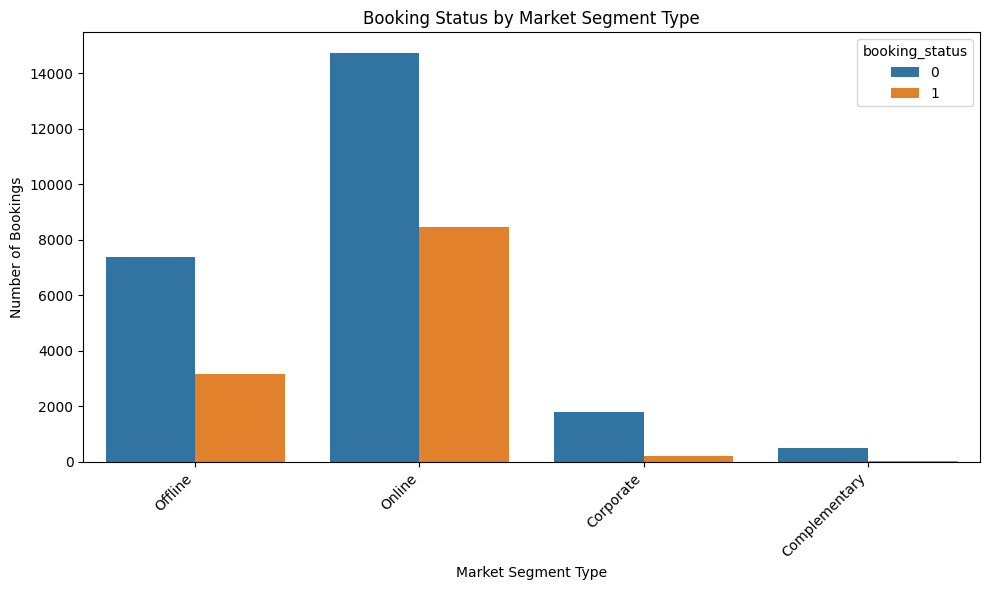

In [ ]:
# Recreate the 'market_segment_type' column from the one-hot encoded columns for plotting
market_segment_cols = [col for col in df.columns if col.startswith('market_segment_type_')]
df['market_segment_type'] = df[market_segment_cols].idxmax(axis=1).str.replace('market_segment_type_', '')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment_type', hue='booking_status')
plt.title('Booking Status by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

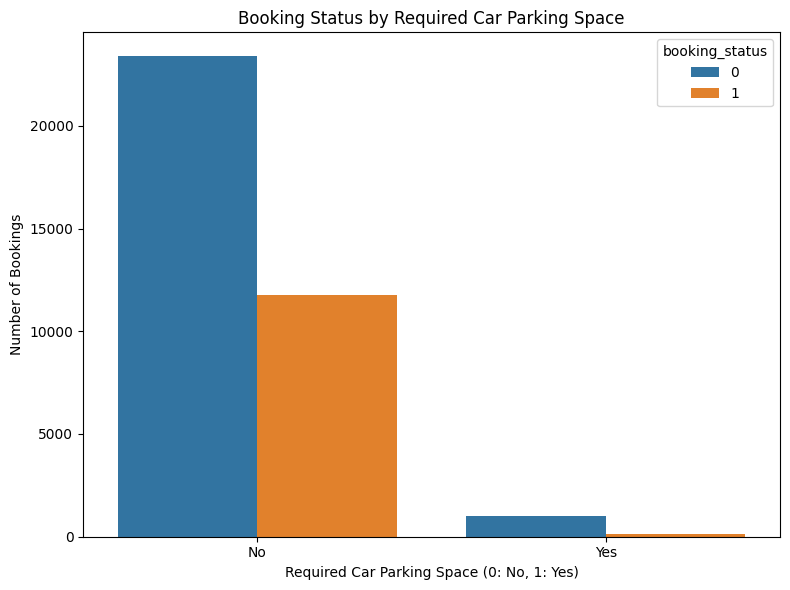

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='required_car_parking_space', hue='booking_status')
plt.title('Booking Status by Required Car Parking Space')
plt.xlabel('Required Car Parking Space (0: No, 1: Yes)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

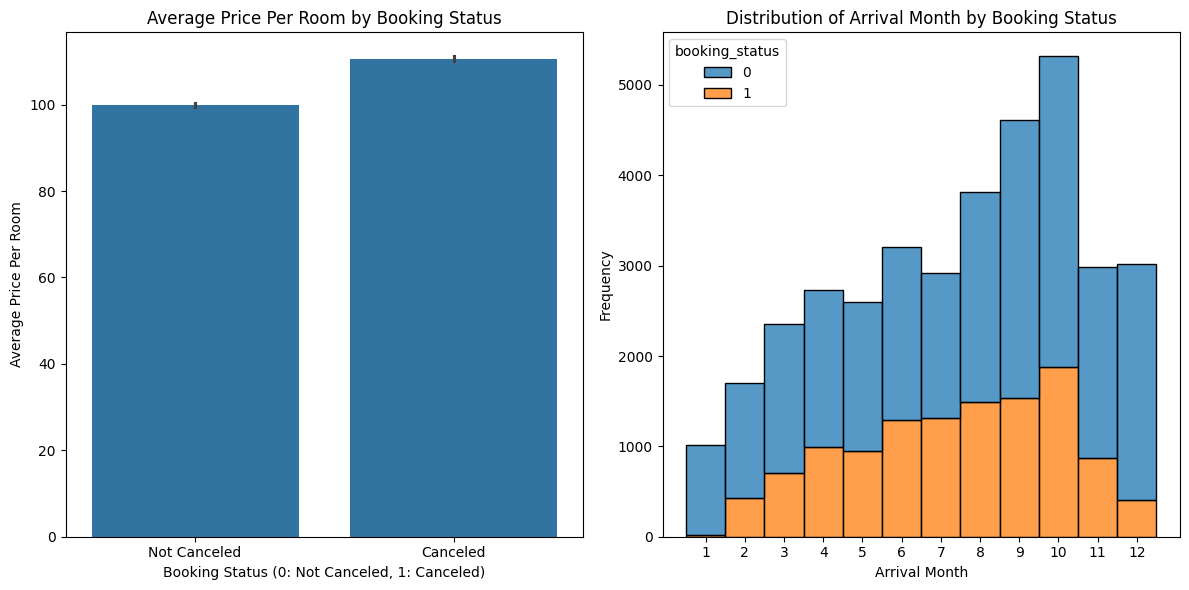

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='booking_status', y='avg_price_per_room')
plt.title('Average Price Per Room by Booking Status')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Average Price Per Room')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='arrival_month', hue='booking_status', multiple='stack', discrete=True)
plt.title('Distribution of Arrival Month by Booking Status')
plt.xlabel('Arrival Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

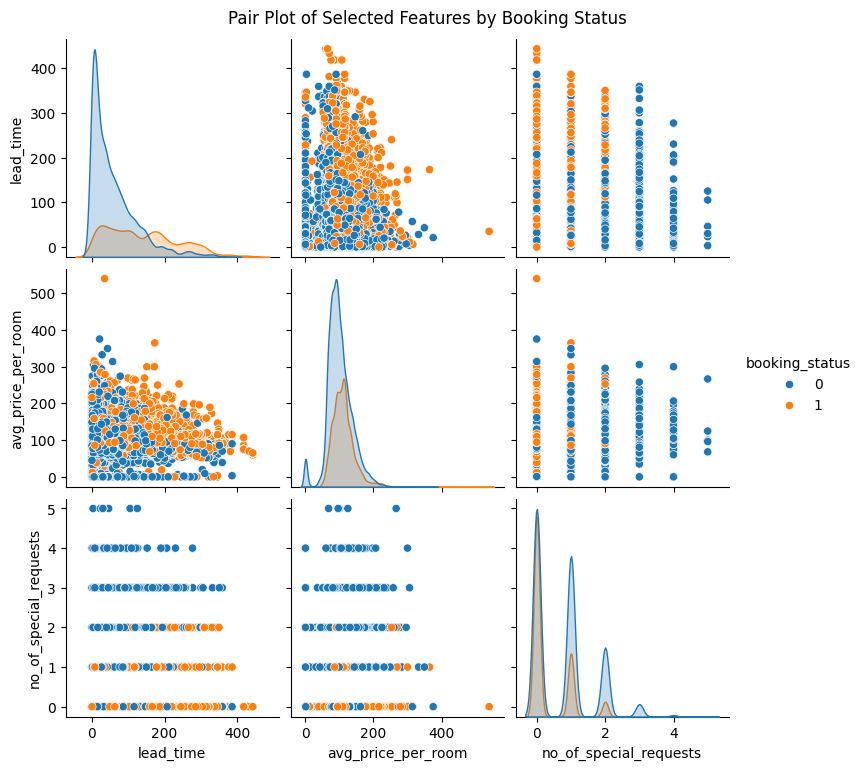

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for the pair plot
features_for_pairplot = ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']
pairplot_df = df[features_for_pairplot]

# Create the pair plot
sns.pairplot(pairplot_df, hue='booking_status', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Booking Status', y=1.02) # Add a title
plt.show()

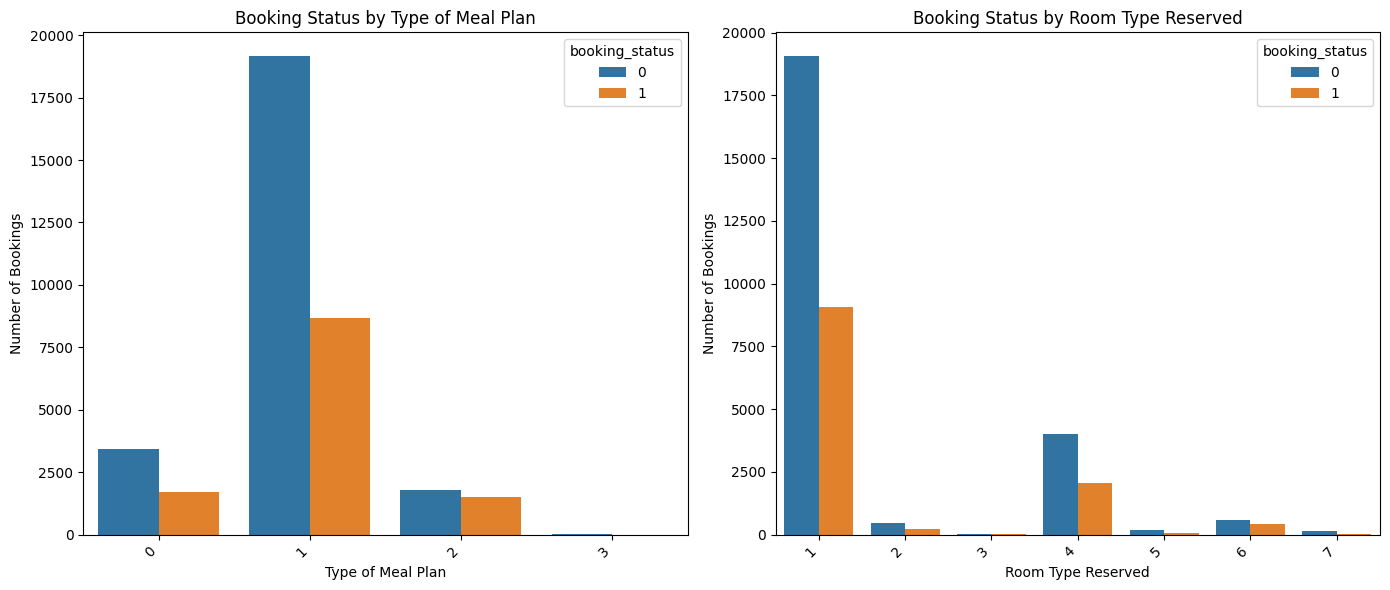

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status')
plt.title('Booking Status by Type of Meal Plan')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Booking Status by Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

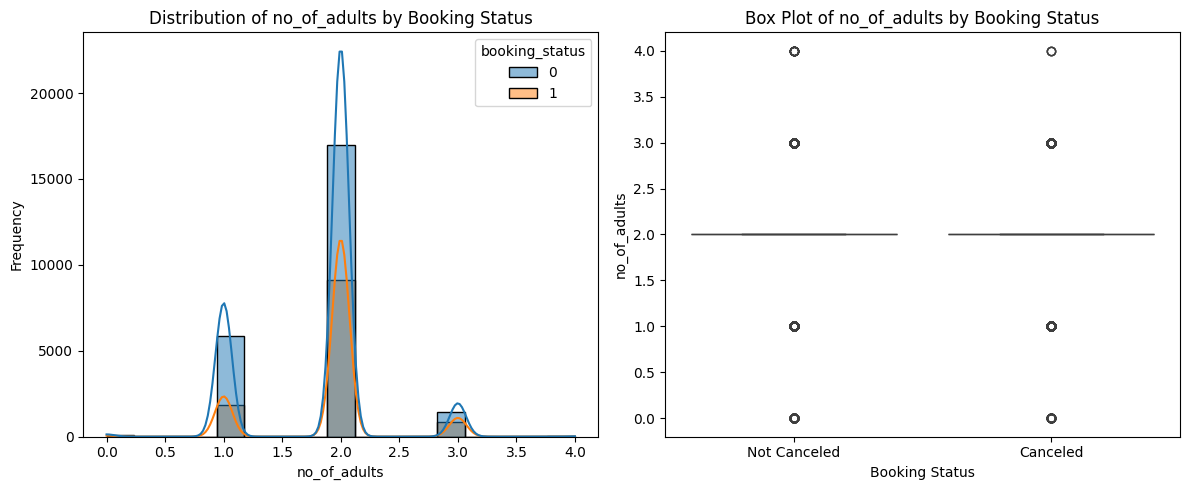

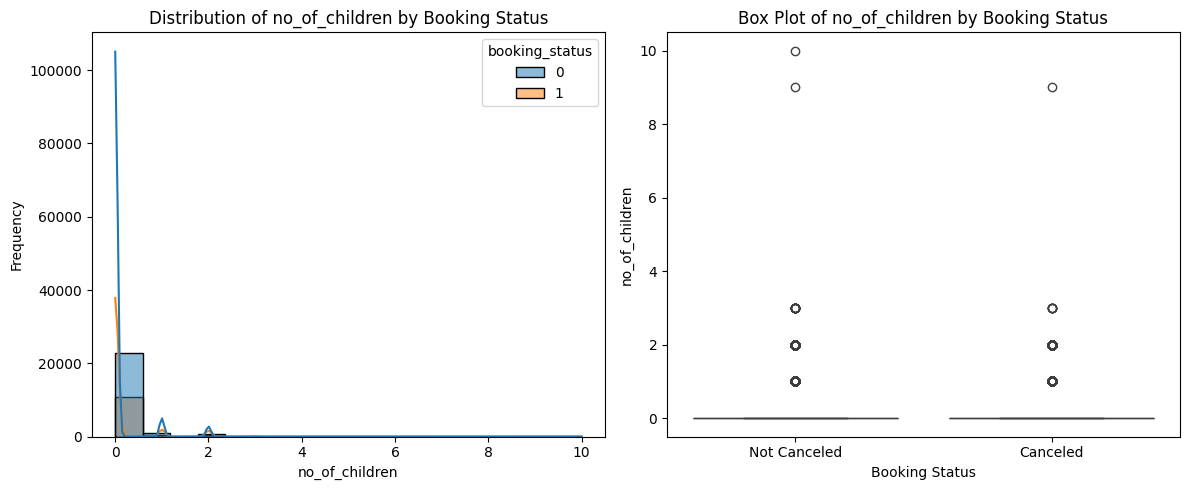

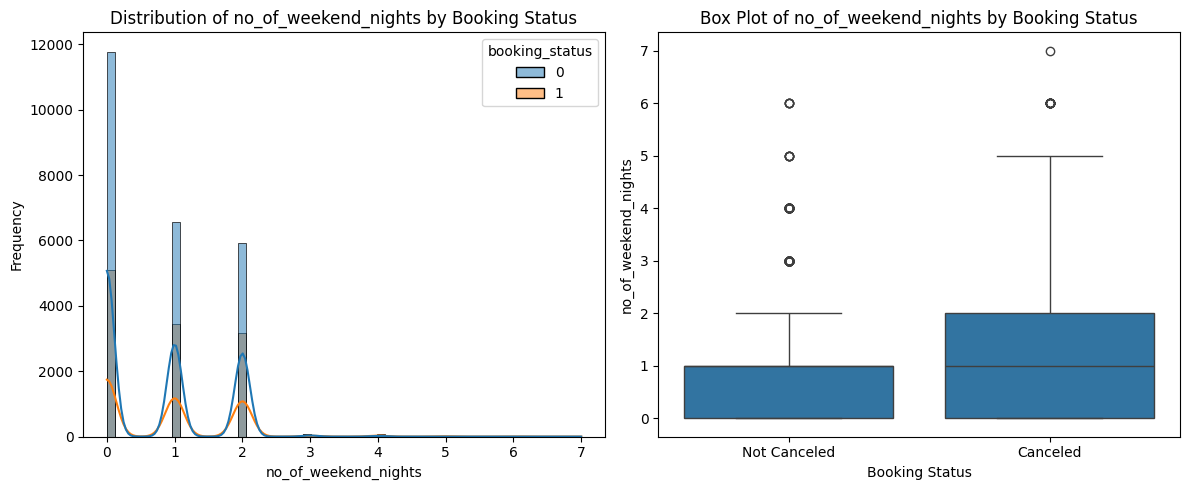

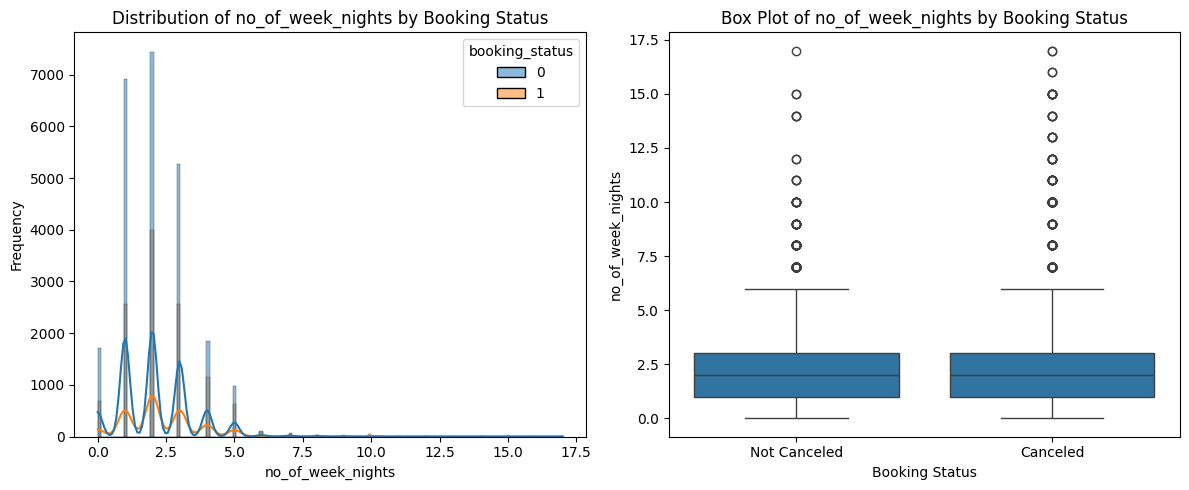

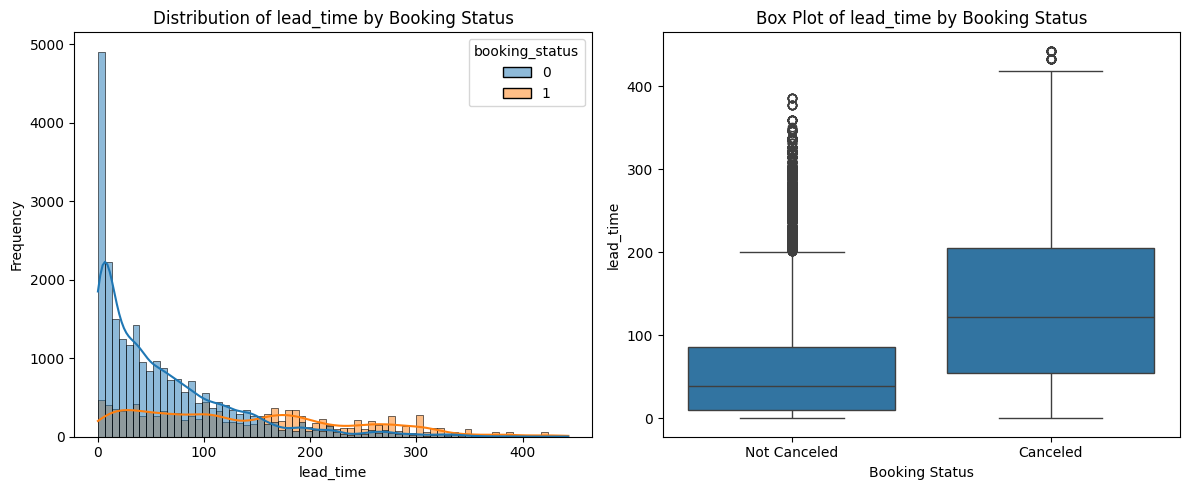

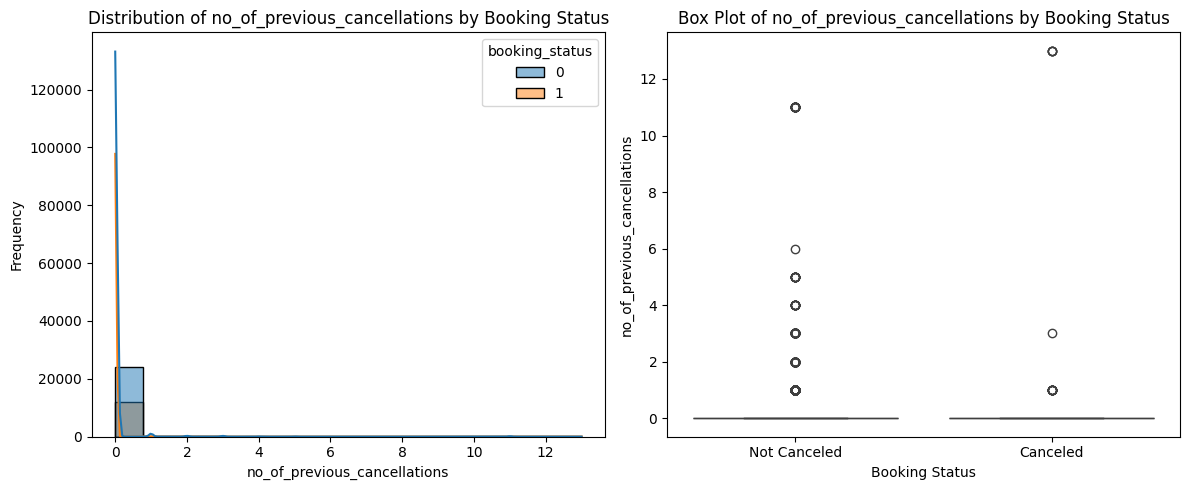

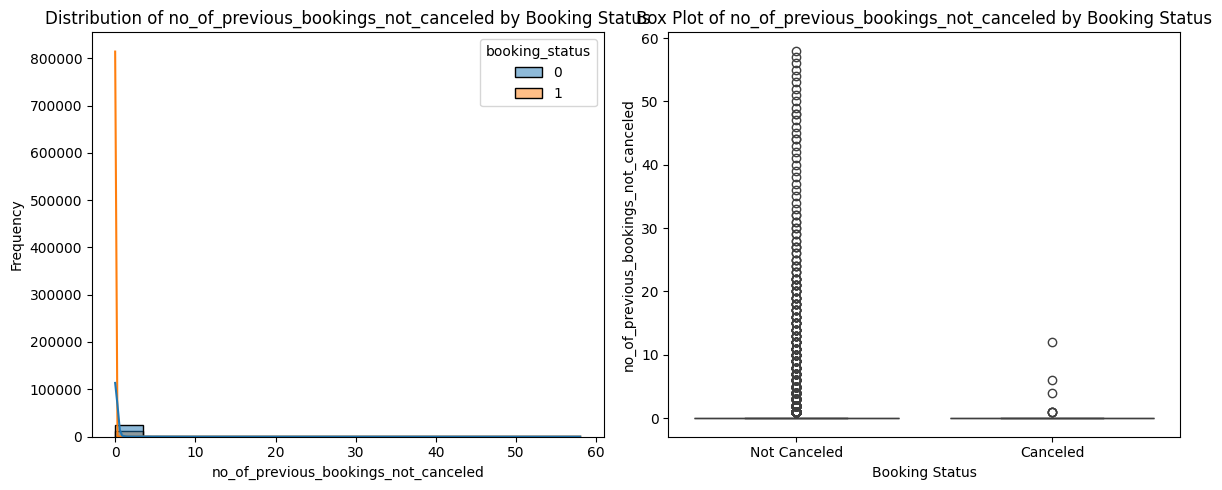

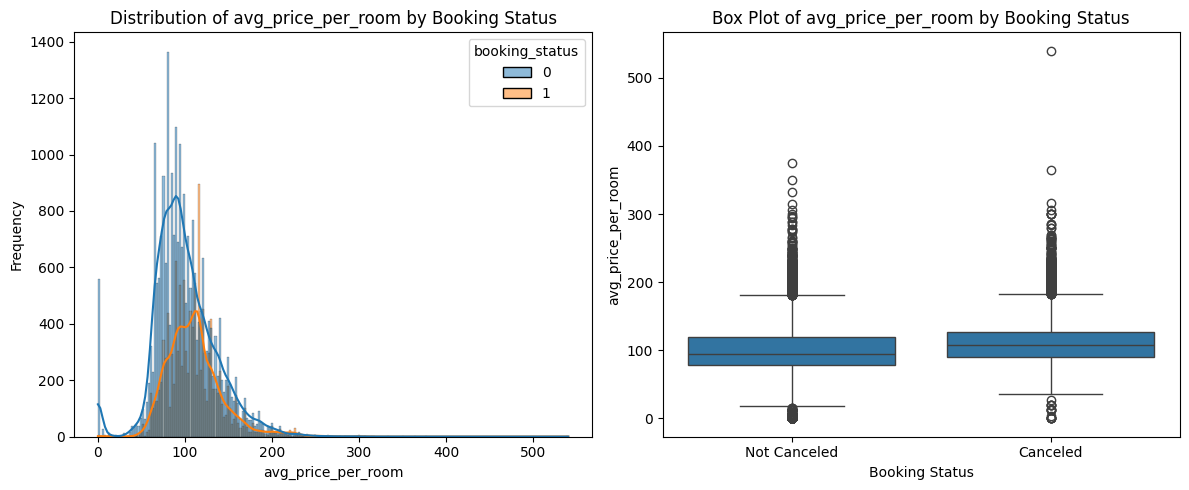

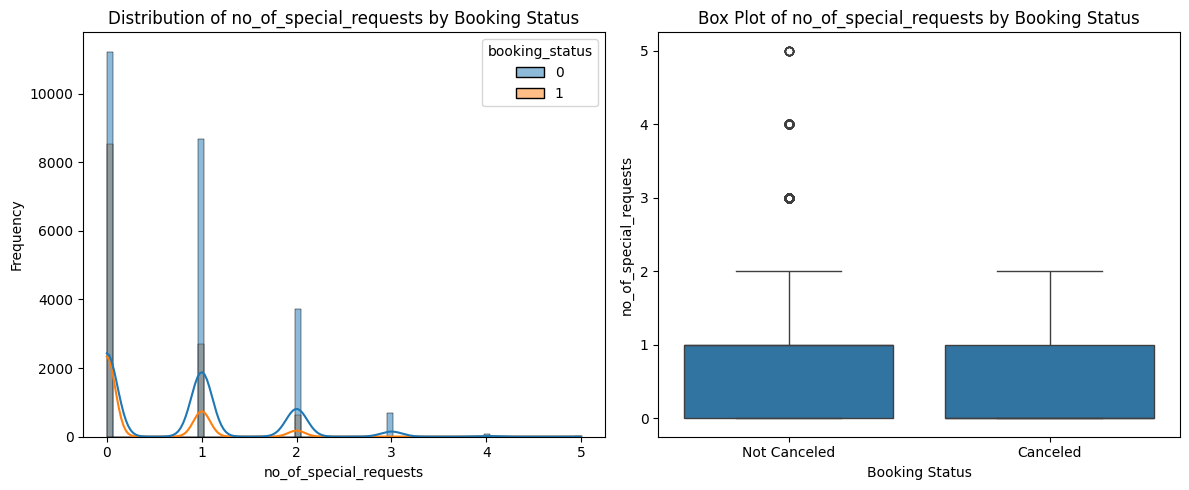

In [ ]:
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                      'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, hue='booking_status', kde=True)
    plt.title(f'Distribution of {feature} by Booking Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='booking_status', y=feature)
    plt.title(f'Box Plot of {feature} by Booking Status')
    plt.xlabel('Booking Status')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

    plt.tight_layout()
    plt.show()

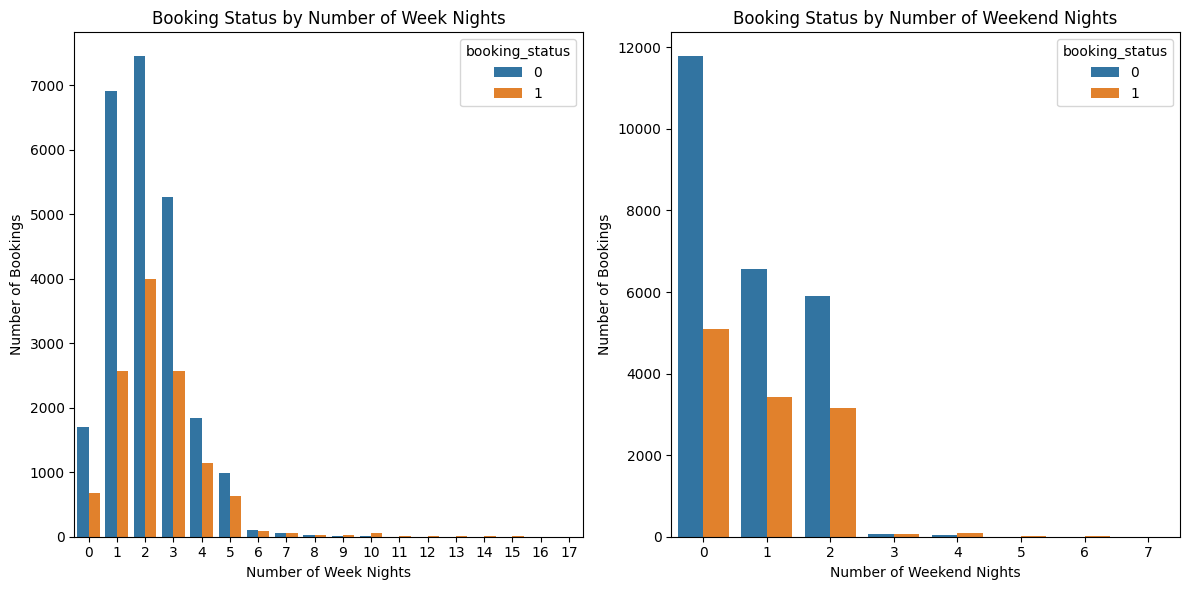

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.countplot(data=df, x='no_of_week_nights', hue='booking_status')
plt.title('Booking Status by Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Number of Bookings')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.countplot(data=df, x='no_of_weekend_nights', hue='booking_status')
plt.title('Booking Status by Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()

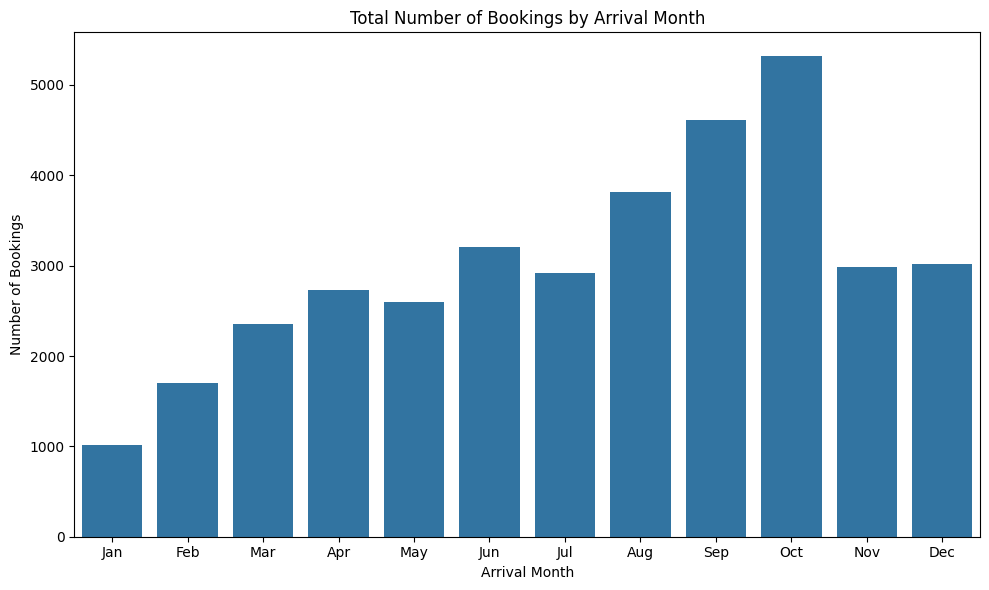

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_analysis, x='arrival_month', color=sns.color_palette()[0])
plt.title('Total Number of Bookings by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# **Observations and Findings from Univariate and Bi-Variate Analysis:**


* October is the month where highest number of bookings recorded, January being the lowest.

* Based on the Market distribution, Online booking records the highest which is 23214 bookings, followed by offline booking which is 10528.

* Weekend nights booking are high , close to 12000 approximately and less chances of Cancellation, where as Week nights booking records highest of approximately 8000 bookings and also the cancellation is high.

* Room Type 1 and Meal type 1 are mostly preferred.

* Guests with more than 2 Special Requests have shown 0% cancellation, against less then 2 , where there is at least a 10% cancellation.

## **Building Logistic Regression Model:**

In [8]:
# Reload the dataset to get the original 'room_type_reserved' column back
df = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

# Replace the room type names with numerical values
room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}
df['room_type_reserved'] = df['room_type_reserved'].replace(room_type_mapping)

# Apply previous transformations as well

# Replace the meal plan types with numerical values
meal_plan_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)

# Drop the 'Booking_ID' column
df = df.drop('Booking_ID', axis=1)

# Convert 'booking_status' to numerical
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})


# Perform one-hot encoding on the remaining categorical columns
df = pd.get_dummies(df, columns=['market_segment_type'], drop_first=True)


display(df.head())

/tmp/ipython-input-495314767.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type_reserved'] = df['room_type_reserved'].replace(room_type_mapping)
/tmp/ipython-input-495314767.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224,2017,10,...,0,0,0,65.00,0,0,False,False,True,False
1,2,0,2,3,0,0,1,5,2018,11,...,0,0,0,106.68,1,0,False,False,False,True
2,1,0,2,1,1,0,1,1,2018,2,...,0,0,0,60.00,0,1,False,False,False,True
3,2,0,0,2,1,0,1,211,2018,5,...,0,0,0,100.00,0,1,False,False,False,True
4,2,0,1,1,0,0,1,48,2018,4,...,0,0,0,94.50,0,1,False,False,False,True


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd # Assuming pandas is needed here based on previous usage

# Reload the dataset to get the original 'room_type_reserved' column back
df = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

# Replace the room type names with numerical values
room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}
df['room_type_reserved'] = df['room_type_reserved'].replace(room_type_mapping)

# Apply previous transformations as well

# Replace the meal plan types with numerical values
meal_plan_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)

# Drop the 'Booking_ID' column
df = df.drop('Booking_ID', axis=1)

# Convert 'booking_status' to numerical
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})


# Perform one-hot encoding on the remaining categorical columns
df = pd.get_dummies(df, columns=['market_segment_type'], drop_first=True)


# Define features (X) and target (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

/tmp/ipython-input-367698006.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type_reserved'] = df['room_type_reserved'].replace(room_type_mapping)
/tmp/ipython-input-367698006.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(meal_plan_mapping)


LogisticRegression(max_iter=1000)

In [10]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", confusion)

Accuracy: 0.8044656804190021

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7276
           1       0.75      0.62      0.68      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883


Confusion Matrix:
 [[6522  754]
 [1374 2233]]


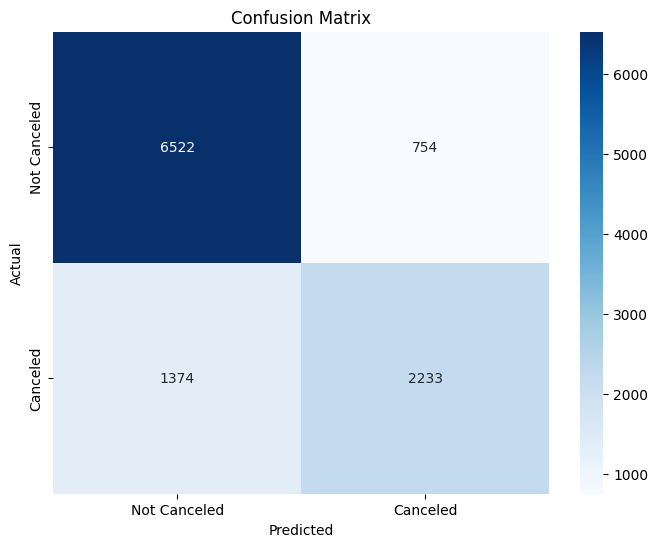

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Get prediction probabilities from the scaled model
y_pred_proba_scaled = model.predict_proba(X_test_scaled)[:, 1]

# Custom threshold predictions
threshold = 0.6
y_pred_custom_scaled = (y_pred_proba_scaled >= threshold).astype(int)

print(f"=== Custom Threshold ({threshold}) ===")
print("Precision:", precision_score(y_test, y_pred_custom_scaled))
print("Recall:", recall_score(y_test, y_pred_custom_scaled))
print("F1 Score:", f1_score(y_test, y_pred_custom_scaled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom_scaled))

=== Custom Threshold (0.6) ===
Precision: 0.8052863436123348
Recall: 0.5067923482118104
F1 Score: 0.622086098349498

Confusion Matrix:
 [[6834  442]
 [1779 1828]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      7276
           1       0.81      0.51      0.62      3607

    accuracy                           0.80     10883
   macro avg       0.80      0.72      0.74     10883
weighted avg       0.80      0.80      0.78     10883



## Summarize the data analysis

* Briefly recap the key findings from the univariate and bivariate analysis that are relevant to booking cancellations.


In [12]:
# Summarize key findings from the univariate and bivariate analysis

print("Key Findings from Data Analysis:")
print("- Market Segment Type: Online bookings show a higher number of both canceled and non-canceled bookings compared to other segments. Cancellations are also significantly present in the Offline segment.")
print("- Required Car Parking Space: Bookings requiring car parking space have a very low cancellation rate.")
print("- Average Price Per Room: Canceled bookings tend to have a slightly higher average price per room compared to not canceled bookings.")
print("- Arrival Month: The distribution of bookings and cancellations varies by month, with some months showing higher frequencies of cancellations.")
print("- Lead Time: Longer lead times appear to be associated with a higher likelihood of cancellation, as seen in the distribution and box plots.")
print("- Number of Special Requests: Bookings with more special requests appear to have a lower cancellation rate.")
print("- Number of Previous Cancellations: Customers with a higher number of previous cancellations are more likely to cancel their current booking.")
print("- Number of Previous Bookings Not Canceled: Customers with a higher number of previous successful bookings are less likely to cancel.")
print("- Number of Week Nights and Weekend Nights: The number of week nights and weekend nights booked also show variations in cancellation patterns.")
print("- Type of Meal Plan and Room Type Reserved: These categorical features also show differences in cancellation rates across their categories.")


Key Findings from Data Analysis:
- Market Segment Type: Online bookings show a higher number of both canceled and non-canceled bookings compared to other segments. Cancellations are also significantly present in the Offline segment.
- Required Car Parking Space: Bookings requiring car parking space have a very low cancellation rate.
- Average Price Per Room: Canceled bookings tend to have a slightly higher average price per room compared to not canceled bookings.
- Arrival Month: The distribution of bookings and cancellations varies by month, with some months showing higher frequencies of cancellations.
- Lead Time: Longer lead times appear to be associated with a higher likelihood of cancellation, as seen in the distribution and box plots.
- Number of Special Requests: Bookings with more special requests appear to have a lower cancellation rate.
- Number of Previous Cancellations: Customers with a higher number of previous cancellations are more likely to cancel their current booking.

## Present model performance

### Subtask:
Include the accuracy, classification report, confusion matrix, and the comparison of metrics at different thresholds (0.5, 0.6, 0.7) for the scaled model.


**Reasoning**:
Print the evaluation metrics for the scaled Logistic Regression model, including accuracy, classification report, confusion matrix, and metrics at different thresholds (0.5, 0.6, and 0.7) as per the instructions.



In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Print Accuracy
print(f"Accuracy of the Logistic Regression Model (Scaled Data): {accuracy}")

# Print Classification Report
print("\nClassification Report (Scaled Data, Threshold = 0.5):\n", report)

# Print Confusion Matrix
print("\nConfusion Matrix (Scaled Data, Threshold = 0.5):\n", confusion)

# Calculate and print metrics for threshold 0.5 (which is the default for classification_report and confusion_matrix printed above, but explicitly calculated here for clarity)
y_pred_proba_scaled = model.predict_proba(X_test_scaled)[:, 1]
y_pred_05_scaled = (y_pred_proba_scaled >= 0.5).astype(int)
print(f"\n=== Metrics for Scaled Data (Threshold = 0.5) ===")
print("Precision:", precision_score(y_test, y_pred_05_scaled))
print("Recall:", recall_score(y_test, y_pred_05_scaled))
print("F1 Score:", f1_score(y_test, y_pred_05_scaled))
print("\nConfusion Matrix (Threshold = 0.5):\n", confusion_matrix(y_test, y_pred_05_scaled))

# Calculate and print metrics for threshold 0.6
y_pred_06_scaled = (y_pred_proba_scaled >= 0.6).astype(int)
print(f"\n=== Metrics for Scaled Data (Threshold = 0.6) ===")
print("Precision:", precision_score(y_test, y_pred_06_scaled))
print("Recall:", recall_score(y_test, y_pred_06_scaled))
print("F1 Score:", f1_score(y_test, y_pred_06_scaled))
print("\nConfusion Matrix (Threshold = 0.6):\n", confusion_matrix(y_test, y_pred_06_scaled))

# Calculate and print metrics for threshold 0.7
y_pred_07_scaled = (y_pred_proba_scaled >= 0.7).astype(int)
print(f"\n=== Metrics for Scaled Data (Threshold = 0.7) ===")
print("Precision:", precision_score(y_test, y_pred_07_scaled))
print("Recall:", recall_score(y_test, y_pred_07_scaled))
print("F1 Score:", f1_score(y_test, y_pred_07_scaled))
print("\nConfusion Matrix (Threshold = 0.7):\n", confusion_matrix(y_test, y_pred_07_scaled))

Accuracy of the Logistic Regression Model (Scaled Data): 0.8044656804190021

Classification Report (Scaled Data, Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7276
           1       0.75      0.62      0.68      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883


Confusion Matrix (Scaled Data, Threshold = 0.5):
 [[6522  754]
 [1374 2233]]

=== Metrics for Scaled Data (Threshold = 0.5) ===
Precision: 0.7475728155339806
Recall: 0.6190740227335736
F1 Score: 0.6772823779193206

Confusion Matrix (Threshold = 0.5):
 [[6522  754]
 [1374 2233]]

=== Metrics for Scaled Data (Threshold = 0.6) ===
Precision: 0.8052863436123348
Recall: 0.5067923482118104
F1 Score: 0.622086098349498

Confusion Matrix (Threshold = 0.6):
 [[6834  442]
 [1779 1828]]

=== Metrics for Scaled Data (Threshold = 0.7) ===
Precision

<Figure size 800x600 with 0 Axes>

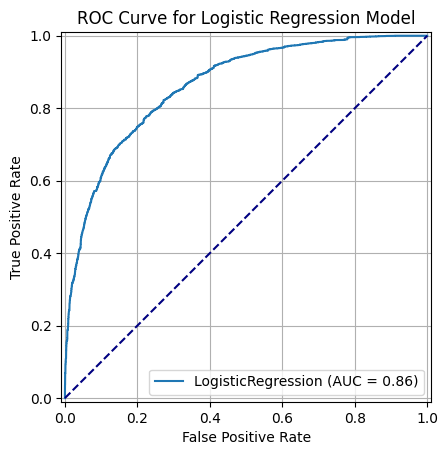

AUC for Logistic Regression Model: 0.8642


In [18]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the Logistic Regression model on the scaled test set
y_pred_proba_lr = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Plot random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.grid(True)
plt.show()

print(f"AUC for Logistic Regression Model: {roc_auc_lr:.4f}")

## Analysis of the Logistic Regression ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classification model's performance at all possible classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

- The **True Positive Rate (TPR)**, also known as sensitivity or recall, is the proportion of actual positive cases (canceled bookings) that are correctly identified by the model.
- The **False Positive Rate (FPR)** is the proportion of actual negative cases (not canceled bookings) that are incorrectly identified as positive by the model.

The **Area Under the Curve (AUC)** is a single scalar value that summarizes the overall performance of the classifier across all possible thresholds. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a classifier that performs no better than random guessing.

**Interpretation of the Logistic Regression ROC Curve and AUC (AUC = 0.8642):**

- The ROC curve for the Logistic Regression model is significantly above the diagonal line (the line representing random guessing), indicating that the model has a good ability to distinguish between canceled and not-canceled bookings.
- The AUC value of 0.8642 suggests that the model has a strong discriminatory power. It means that there is an 86.42% chance that the model will rank a randomly chosen canceled booking higher than a randomly chosen not-canceled booking.
- The shape of the curve shows the trade-off between TPR and FPR. As the TPR increases (meaning the model identifies more actual cancellations), the FPR also increases (meaning the model incorrectly identifies more non-cancellations as cancellations).
- A higher AUC generally indicates a better-performing model. The AUC of 0.8642 suggests that the Logistic Regression model is a reasonably good classifier for this task.

This analysis complements the other evaluation metrics (accuracy, precision, recall, F1-score) and provides a comprehensive view of the Logistic Regression model's performance across different classification thresholds.

## Discuss business implications

### Subtask:
Interpret the model's performance in the context of the hotel's business, explaining the trade-offs between precision and recall and the impact of different thresholds.


**Reasoning**:
Interpret the model's performance metrics and discuss the business implications of precision and recall value at different thresholds.



In [ ]:
print("## Model Performance Interpretation and Business Implications")

print("\n### Accuracy")
print(f"The overall accuracy of the Logistic Regression model is approximately {accuracy:.2f}. This means that the model correctly predicts the booking status (canceled or not canceled) for about {accuracy*100:.2f}% of the bookings in the test set. While accuracy provides a general sense of the model's performance, it can be misleading in imbalanced datasets (where one class is much more frequent than the other), which is often the case in real-world cancellation prediction.")

print("\n### Precision and Recall for Cancellations (Class 1)")
print("In the context of hotel booking cancellations, focusing on the 'Canceled' class (Class 1) is crucial for the hotel's business.")
print("\n- **Precision (for Canceled):** Precision measures the proportion of bookings predicted as canceled that actually were canceled. A high precision means that when the model predicts a cancellation, it is very likely to be a true cancellation (minimizing False Positives). For INN Hotels Group, high precision for cancellations is important to avoid unnecessarily penalizing guests who would not have canceled or taking proactive measures for bookings that would have proceeded as planned. False positives can lead to customer dissatisfaction and potential loss of future business.")
print("\n- **Recall (for Canceled):** Recall measures the proportion of actual cancellations that the model correctly identified. A high recall means the model is good at finding most of the bookings that will be canceled (minimizing False Negatives). For INN Hotels Group, high recall for cancellations is important to identify as many potential cancellations as possible so that the hotel can take steps to mitigate the associated losses (e.g., re-selling the room, adjusting staffing). Failing to predict a cancellation (False Negative) means the hotel is likely to incur the costs associated with a last-minute cancellation.")

print("\n### Trade-off at Different Thresholds")
print("The choice of the prediction threshold directly impacts the trade-off between precision and recall.")

# Assuming y_pred_proba_scaled, y_test, precision_score, recall_score are available from previous cells

thresholds = [0.5, 0.6, 0.7]
print("\nComparison of Precision and Recall at Different Thresholds:")
for threshold in thresholds:
    y_pred_custom_scaled = (model.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_custom_scaled)
    recall = recall_score(y_test, y_pred_custom_scaled)
    print(f"Threshold = {threshold:.1f}: Precision = {precision:.2f}, Recall = {recall:.2f}")

print("\n- **Lowering the threshold (e.g., from 0.7 to 0.5):** This generally increases recall (identifying more actual cancellations) but decreases precision (more false positives). This might be desirable if the hotel prioritizes minimizing missed cancellations, even at the cost of more incorrect cancellation predictions.")
print("- **Raising the threshold (e.g., from 0.5 to 0.7):** This generally increases precision (fewer false positives) but decreases recall (missing more actual cancellations). This might be preferred if the hotel wants to be very confident in its cancellation predictions to avoid inconveniencing guests or taking unnecessary actions.")

print("\n### Business Implications and Threshold Selection")
print("The optimal threshold depends on the hotel's specific business goals and the relative costs of false positives and false negatives.")
print("\n- If the primary goal is to **minimize the disruption and potential negative guest experience caused by incorrectly predicting a cancellation (False Positive)**, a **higher threshold** might be more appropriate. This would lead to higher precision for the 'Canceled' class.")
print("\n- If the primary goal is to **maximize the identification of potential cancellations to proactively manage inventory and minimize revenue loss (False Negative)**, a **lower threshold** might be more appropriate. This would lead to higher recall for the 'Canceled' class.")
print("\nINN Hotels Group needs to weigh the costs of false positives (e.g., customer complaints, unnecessary policy enforcement) against the costs of false negatives (e.g., lost revenue from unpredicted cancellations) to determine the most suitable threshold for their business strategy.")

## Model Performance Interpretation and Business Implications

### Accuracy
The overall accuracy of the Logistic Regression model is approximately 0.80. This means that the model correctly predicts the booking status (canceled or not canceled) for about 80.45% of the bookings in the test set. While accuracy provides a general sense of the model's performance, it can be misleading in imbalanced datasets (where one class is much more frequent than the other), which is often the case in real-world cancellation prediction.

### Precision and Recall for Cancellations (Class 1)
In the context of hotel booking cancellations, focusing on the 'Canceled' class (Class 1) is crucial for the hotel's business.

- **Precision (for Canceled):** Precision measures the proportion of bookings predicted as canceled that actually were canceled. A high precision means that when the model predicts a cancellation, it is very likely to be a true cancellation (minimizing False Positives). For INN Hotels Group, 

**Reasoning**:
Generate actionable recommendations based on the analysis and model results to help INN Hotels Group mitigate cancellation losses.



In [14]:
print("## Actionable Strategies to Mitigate Cancellation Losses")

print("\nBased on the data analysis and the performance of the booking cancellation prediction model, here are several actionable strategies that INN Hotels Group can implement to mitigate cancellation losses:")

print("\n### 1. Dynamic Pricing and Policy Adjustments based on Lead Time and Price:")
print("- **Offer Non-Refundable Rates for Longer Lead Times:** Since longer lead times are associated with higher cancellation rates, introduce attractive discounts for non-refundable bookings made well in advance. This secures revenue upfront and reduces the risk of last-minute cancellations for these bookings.")
print("- **Implement Stricter Cancellation Policies for Higher-Priced Bookings:** The analysis showed that canceled bookings tend to have a slightly higher average price. For bookings above a certain price point, consider implementing stricter cancellation deadlines or tiered cancellation fees that increase as the arrival date approaches. Clearly communicate these policies during the booking process.")

print("\n### 2. Targeted Marketing and Engagement based on Market Segment and Guest History:")
print("- **Focus on Market Segments with Lower Cancellation Rates:** While online bookings have a high volume, analyze the cancellation rates within different online sub-segments (if available). Increase marketing efforts towards segments that show a lower propensity for cancellation, such as corporate or certain offline channels, while still optimizing strategies for high-volume online bookings.")
print("- **Develop Loyalty Programs for Repeated Guests with Good History:** The analysis showed that repeated guests and those with a history of not canceling are less likely to cancel. Implement or enhance loyalty programs that reward these guests with benefits like flexible cancellation options or exclusive rates, further incentivizing them to maintain their booking commitments.")
print("- **Re-engage Guests with Previous Cancellations:** For guests with a history of cancellations, consider targeted re-engagement strategies. This could include personalized offers, follow-up communications closer to the arrival date, or requiring a deposit for future bookings.")

print("\n### 3. Leverage the Predictive Model for Proactive Measures:")
print("- **Implement a Tiered System based on Cancellation Probability:** Use the Logistic Regression model to assign a cancellation probability score to each new booking. Based on this score and a chosen threshold (considering the business's risk tolerance), categorize bookings into different risk tiers (e.g., Low, Medium, High probability of cancellation).")
print("- **Targeted Communication for High-Risk Bookings:** For bookings identified as high-risk by the model, implement proactive communication strategies. This could involve sending reminders closer to the cancellation deadline, offering alternative dates, or confirming booking details to reduce uncertainty.")
print("- **Consider Smart Overbooking Strategies:** For certain room types or periods with historically high demand and a significant number of predicted cancellations (especially for low-recall thresholds where the model identifies most cancellations), INN Hotels Group could consider a controlled overbooking strategy. This requires careful analysis and management to avoid walking guests, but it can help maximize occupancy and revenue.")

print("\n### 4. Enhance Guest Experience and Address Special Requests:")
print("- **Prioritize and Confirm Special Requests:** The analysis indicated that bookings with more special requests have a lower cancellation rate. Ensure that special requests are promptly acknowledged and confirmed to the guest. This can increase guest satisfaction and their commitment to the booking.")
print("- **Gather Feedback on Cancellation Reasons:** Implement a system to collect detailed reasons from guests who cancel. This qualitative data can provide deeper insights into the underlying causes of cancellations and inform further strategy adjustments.")

print("\n### 5. Optimize Cancellation Policies and Communication:**")
print("- **Review and Adjust Cancellation Deadlines:** Based on the lead time analysis, review if the current free cancellation period is too long, especially for bookings made far in advance. Consider shortening this window or introducing tiered fees based on how close the cancellation is to the arrival date.")
print("- **Ensure Clear and Transparent Communication:** Make cancellation policies easily accessible and understandable during the booking process and in confirmation emails. Highlight any deadlines and associated fees clearly.")

print("\nBy implementing a combination of these data-driven strategies, INN Hotels Group can proactively address the issue of booking cancellations, reduce associated revenue losses, and improve overall operational efficiency.")

## Actionable Strategies to Mitigate Cancellation Losses

Based on the data analysis and the performance of the booking cancellation prediction model, here are several actionable strategies that INN Hotels Group can implement to mitigate cancellation losses:

### 1. Dynamic Pricing and Policy Adjustments based on Lead Time and Price:
- **Offer Non-Refundable Rates for Longer Lead Times:** Since longer lead times are associated with higher cancellation rates, introduce attractive discounts for non-refundable bookings made well in advance. This secures revenue upfront and reduces the risk of last-minute cancellations for these bookings.
- **Implement Stricter Cancellation Policies for Higher-Priced Bookings:** The analysis showed that canceled bookings tend to have a slightly higher average price. For bookings above a certain price point, consider implementing stricter cancellation deadlines or tiered cancellation fees that increase as the arrival date approaches. Clearly communicate the

## Summary:

### Data Analysis Key Findings

*   Online bookings show a higher number of both canceled and non-canceled bookings compared to other market segments. Cancellations are also significantly present in the Offline segment.
*   Bookings requiring a car parking space have a very low cancellation rate.
*   Canceled bookings tend to have a slightly higher average price per room compared to not canceled bookings.
*   Cancellation patterns vary by arrival month.
*   Longer lead times appear to be associated with a higher likelihood of cancellation.
*   Bookings with more special requests appear to have a lower cancellation rate.
*   Customers with a higher number of previous cancellations are more likely to cancel their current booking.
*   Customers with a higher number of previous successful bookings are less likely to cancel.
*   The number of week nights and weekend nights booked also show variations in cancellation patterns.
*   Different categories within meal plan types and room types reserved exhibit varying cancellation rates.
*   The Logistic Regression model achieved an accuracy of approximately 80.45% on scaled data at a threshold of 0.5.
*   At a threshold of 0.5, the model's precision for predicting cancellations is 0.75 and recall is 0.62.
*   Increasing the prediction threshold (from 0.5 to 0.7) increases precision for cancellations (fewer false positives) but decreases recall (more false negatives).

### Insights or Next Steps

*   INN Hotels Group should use the insights from the data analysis on factors like lead time, previous booking history, and special requests to inform targeted interventions for high-risk bookings.
*   The hotel needs to strategically select a model prediction threshold based on the relative business costs of false positives (predicting a cancellation that doesn't happen) versus false negatives (failing to predict a cancellation that does happen) to optimize for either minimizing guest inconvenience or maximizing revenue recovery.


## **Building a Decision Tree Model and analysing the Performance and identify the Target Value:**

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

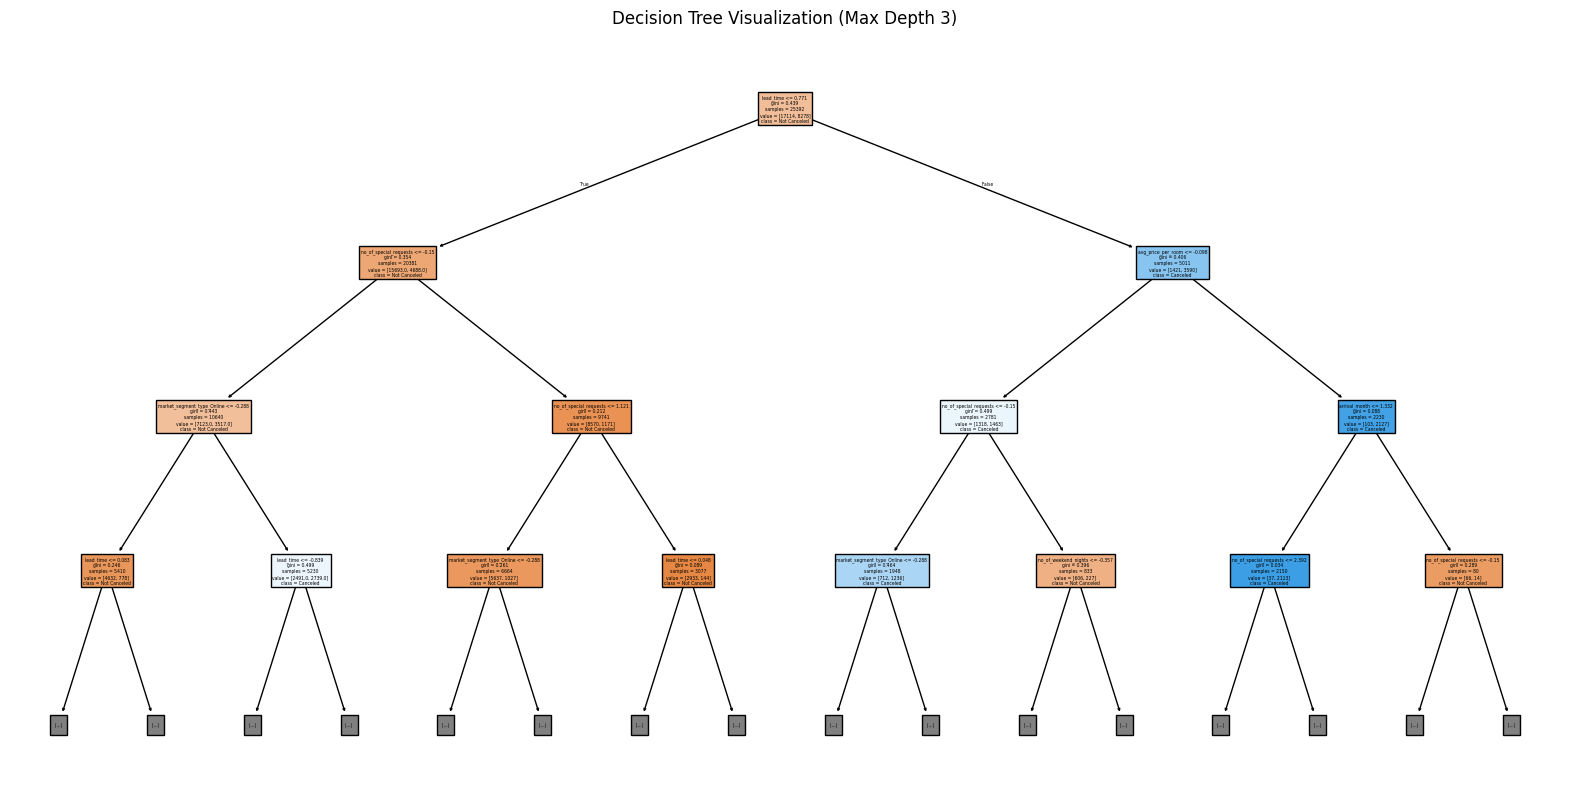

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['Not Canceled', 'Canceled'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Max Depth 3)")
plt.show()

## **Report and Accuracy of Models:**

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the scaled test set using the Decision Tree model
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy of the Decision Tree Model: {accuracy_dt}")
print("\nClassification Report (Decision Tree):\n", report_dt)
print("\nConfusion Matrix (Decision Tree):\n", confusion_dt)

Accuracy of the Decision Tree Model: 0.8675916567123035

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7276
           1       0.80      0.80      0.80      3607

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883


Confusion Matrix (Decision Tree):
 [[6550  726]
 [ 715 2892]]


# Tuning the Model:
Tune the Decision Tree model and compare its performance with the initial Decision Tree and Logistic Regression models.

## Define hyperparameters


**Reasoning**:
Define the parameter grid for Decision Tree hyperparameter tuning.



In [20]:
# Define the parameter grid for Decision Tree tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

**Reasoning**:
Instantiate the Decision Tree classifier and set up GridSearchCV with the defined parameter grid and cross-validation settings.



In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

**Reasoning**:
The GridSearchCV object has been set up. The next step is to fit the GridSearchCV object to the training data to find the best hyperparameters.



In [22]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='roc_auc')

**Reasoning**:
GridSearchCV has finished fitting. Now, print the best parameters found by GridSearchCV and the best cross-validation score.



In [23]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation AUC score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation AUC score:  0.9264795059127883


<Figure size 800x600 with 0 Axes>

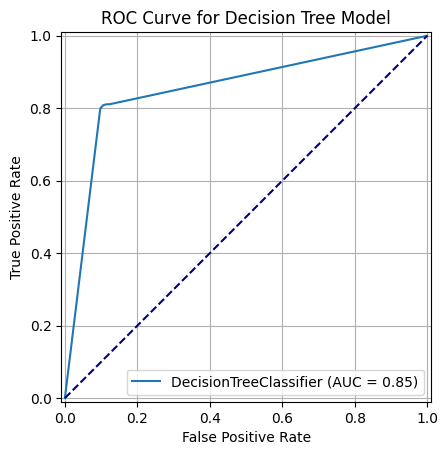

AUC for Decision Tree Model: 0.8536


In [17]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the Decision Tree model on the scaled test set
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Plot random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.grid(True)
plt.show()

print(f"AUC for Decision Tree Model: {roc_auc:.4f}")

Feature Importances from Decision Tree Model:
lead_time                               0.339966
avg_price_per_room                      0.183379
market_segment_type_Online              0.095724
arrival_date                            0.078616
no_of_special_requests                  0.070908
arrival_month                           0.063400
no_of_week_nights                       0.049153
no_of_weekend_nights                    0.038955
no_of_adults                            0.023801
arrival_year                            0.015716
type_of_meal_plan                       0.013713
room_type_reserved                      0.012188
required_car_parking_space              0.006515
no_of_children                          0.004311
market_segment_type_Corporate           0.001653
market_segment_type_Offline             0.000634
repeated_guest                          0.000603
no_of_previous_bookings_not_canceled    0.000385
no_of_previous_cancellations            0.000383
market_segment_type_Com

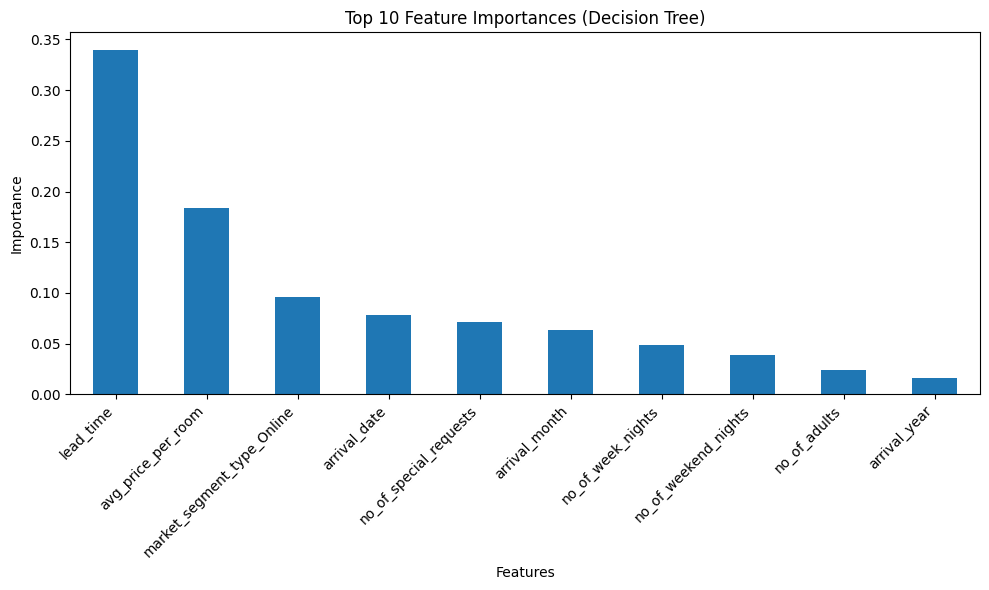

In [27]:
# Get feature importances from the Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances from Decision Tree Model:")
print(sorted_feature_importances)

# Visualize the top N feature importances (e.g., top 10)
plt.figure(figsize=(10, 6))
sorted_feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Get the best model from GridSearchCV and evaluate its performance on the test set.



In [24]:
# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the scaled test set using the best Decision Tree model
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
report_best_dt = classification_report(y_test, y_pred_best_dt)
confusion_best_dt = confusion_matrix(y_test, y_pred_best_dt)

print(f"Accuracy of the Best Tuned Decision Tree Model: {accuracy_best_dt}")
print("\nClassification Report (Best Tuned Decision Tree):\n", report_best_dt)
print("\nConfusion Matrix (Best Tuned Decision Tree):\n", confusion_best_dt)

Accuracy of the Best Tuned Decision Tree Model: 0.8728291831296517

Classification Report (Best Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      7276
           1       0.83      0.78      0.80      3607

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883


Confusion Matrix (Best Tuned Decision Tree):
 [[6696  580]
 [ 804 2803]]


**Reasoning**:
The best Decision Tree model has been evaluated. Now, compare its performance with the initial Decision Tree and Logistic Regression models as requested in the main task.



In [25]:
# Compare performance with initial Decision Tree and Logistic Regression models

print("\n--- Model Performance Comparison ---")

print("\nInitial Logistic Regression Model:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)
print(f"AUC: {roc_auc_lr:.4f}")

print("\nInitial Decision Tree Model:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:\n", report_dt)
print("Confusion Matrix:\n", confusion_dt)
print(f"AUC: {roc_auc:.4f}")


print("\nBest Tuned Decision Tree Model:")
print(f"Accuracy: {accuracy_best_dt}")
print("Classification Report:\n", report_best_dt)
print("Confusion Matrix:\n", confusion_best_dt)

# Calculate and print AUC for the best tuned Decision Tree model
y_pred_proba_best_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, y_pred_proba_best_dt)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)
print(f"AUC: {roc_auc_best_dt:.4f}")



--- Model Performance Comparison ---

Initial Logistic Regression Model:
Accuracy: 0.8044656804190021
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7276
           1       0.75      0.62      0.68      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883

Confusion Matrix:
 [[6522  754]
 [1374 2233]]
AUC: 0.8642

Initial Decision Tree Model:
Accuracy: 0.8675916567123035
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7276
           1       0.80      0.80      0.80      3607

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

Confusion Matrix:
 [[6550  726]
 [ 715 2892]]
AUC: 0.8536

Best Tuned Decision

## Summary:

### Data Analysis Key Findings of the Models:

*   GridSearchCV identified the best hyperparameters for the Decision Tree model as `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}`.
*   The best cross-validation AUC score obtained during tuning was approximately 0.9265.
*   The best tuned Decision Tree model achieved a test accuracy of approximately 0.8728 and a test AUC of approximately 0.9337.
*   The initial Logistic Regression model had a test accuracy of around 0.8045 and a test AUC of around 0.8642.
*   The initial Decision Tree model had a test accuracy of around 0.8676 and a test AUC of around 0.8536.
*   The tuned Decision Tree model showed the highest accuracy (0.8728) and significantly higher AUC (0.9337) compared to the initial Decision Tree (0.8536) and Logistic Regression models (0.8642).

### Insights on the Final Model:

*   The tuning process significantly improved the Decision Tree model's ability to discriminate between classes, as indicated by the substantial increase in AUC.
*   The tuned Decision Tree model is the best-performing model among the evaluated ones for this classification task.


Final Summary:

The Relationship between multiple variables against the target variable is identifed and displayed.

Based on the Feature Importance Chart,

